In [3]:
!pip install --quiet --upgrade langchain-text-splitters langchain-community langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/2.5 MB ? eta -:--:--
   ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.4/2.5 MB 10.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 2.5/2.5 MB 37.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 4.8 MB/s eta 0:00:00


In [4]:
!pip install -qU langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/54.5 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.7/412.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.8 MB/s eta 0:00:00


In [5]:
!pip install langchain
!pip install langchain_core
!pip install beautifulsoup4
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 43.4 MB/s eta 0:00:00


In [ ]:
import getpass
import os

if not os.environ.get("OPENAI_API_KEY"):
  os.environ["OPENAI_API_KEY"] = ""

from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")

In [ ]:
from getpass import getpass
ACCESS_TOKEN = ""

In [ ]:
os.environ["OPENAI_API_KEY"] = ""
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGSMITH_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGSMITH_API_KEY"] = ""
os.environ["LANGSMITH_PROJECT"] = "capstone_test"

In [ ]:
from langchain.document_loaders import GithubFileLoader

loader = GithubFileLoader(
    repo="",  # the repo name
    access_token=ACCESS_TOKEN,
    github_api_url="https://api.github.com",
    file_filter=lambda file_path: file_path.endswith(
        ".txt"
    ),  # load all text files.
)
documents = loader.load()

In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(openai_api_key="")

In [ ]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(openai_api_key="")

In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter


text_splitter = RecursiveCharacterTextSplitter()
documents = text_splitter.split_documents(documents)
vector = FAISS.from_documents(documents, embeddings)

In [ ]:
import getpass
import os

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("TAVILY_API_KEY")

TAVILY_API_KEY: ··········


In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily_tool = TavilySearchResults(max_results=2)
tools_list = [tavily_tool]
#tavily_tool.invoke("What's a 'node' in LangGraph?")

llm_with_tools = llm.bind_tools(tools_list)

ValidationError: 1 validation error for TavilySearchAPIWrapper
  Value error, Did not find tavily_api_key, please add an environment variable `TAVILY_API_KEY` which contains it, or pass `tavily_api_key` as a named parameter. [type=value_error, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.10/v/value_error

In [9]:

from langchain_core.tools import tool

@tool("input_tool", return_direct=False)
def input_tool(start_date, end_date, from_city, to_city) -> str:
  """
    Use this tool when you need to collect inputs for car rental.
    Check that all the inputs are present.  Do not make up these data but ask the user if any are missing.
    Return "inputs" if some are missing, otherwise "booking" if the user can proceed to selecting a car.
  """

  # check for the values we have been given
  print(start_date, end_date, from_city, to_city)

  if start_date != "None" and end_date != "None" and from_city != "None" and to_city != "None":
    return {"status":"booking", "start_date": start_date, "end_date": end_date, "from_city": from_city, "to_city": to_city}
  else :
    return {"status":"inputs", "start_date": start_date, "end_date": end_date, "from_city": from_city, "to_city": to_city}

@tool("booking_tool", return_direct=False)
def booking_tool(selected_car, start_date, end_date, from_city, to_city) -> str:
  """
    Use this tool when you need to search for available cars to rent given inputs provided by the user.
    Return "confirmed" if the user has selected a car.
  """

  # check for the values we have been given
  print("Entering booking_tool with dates and selected car variable " + str(selected_car))

  if selected_car == None or selected_car == "None":
    return {"status":"booking", "selected_car": "None", "available_cars": ["Honda", "Toyota", "Volvo"]}
  else :
    return {"status":"confirmed", "selected_car":selected_car}


In [10]:
import json

from langchain_core.messages import ToolMessage

class BasicToolNode:
    """A node that runs the tools requested in the last AIMessage."""

    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools}

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("No message found in input")
        outputs = []
        for tool_call in message.tool_calls:
            print("Calling tool " + tool_call["name"] + " with args " + str(tool_call["args"]))

            tool_result = self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
            )
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        print( "Tool return value is " + str(tool_result) )
        return {"messages": outputs} | tool_result



In [11]:
from langgraph.graph import MessagesState
from typing_extensions import List, TypedDict
from langgraph.checkpoint.memory import MemorySaver
from typing import Annotated
from langgraph.graph.message import add_messages
from typing import Sequence
from langchain_core.messages import BaseMessage
from langchain_core.documents import Document

class State(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]
    available_cars: List[str]
    selected_car: str
    start_date: str
    end_date: str
    from_city: str
    to_city: str
    status: str # one of "inputs", "booking", or "confirmed"

# Set up memory
memory = MemorySaver()


In [12]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

inputs_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are an assistant for booking car rentals.  Focus on asking the user for their rental start and end dates and also which cities they will drive from and to.  Use the inputs_tool to validate these data.  Do not make up these data but ask for the user to provide them if missing."),
        MessagesPlaceholder("messages"),
        "Please fill out this form: {start_date}, {end_date}, {from_city}, {to_city}"
    ]
)

booking_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are an assistant for booking car rentals. Given rental dates with cities provided by the user help the user select from available cars at those times and cities.  Do not make up the selected_car but use the booking tool to get a list of available cars and ask for the user to select one."),
        MessagesPlaceholder("messages")
    ]
)

In [13]:
def route_tools(
    state: State,
):
    """
    Use in the conditional_edge to route to the ToolNode if the last message
    has tool calls. Otherwise, route to the end.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return END

def get_status(state: State):
    """
    Use in the conditional_edge to route based on state.
    """
    return state["status"]

In [14]:
import bs4
from langchain import hub
from langchain_community.document_loaders import WebBaseLoader
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langgraph.graph import START, END, StateGraph
from langgraph.graph import MessagesState
from typing_extensions import List, TypedDict
from langgraph.checkpoint.memory import MemorySaver
from typing import Annotated
from langgraph.graph.message import add_messages

# Define application steps

def inputs(state: State):
    print("Entering inputs node")
    full_prompt = inputs_prompt.invoke(
        {
         "start_date": state.get("start_date", None),
         "end_date": state.get("end_date", None),
         "from_city": state.get("from_city", None),
         "to_city": state.get("to_city", None),
         "messages" : state["messages"]}
        )
    llm_with_tools = llm.bind_tools([input_tool])
    result = llm_with_tools.invoke(full_prompt)

    return {"messages": [result]}

# Step 1: collect inputs for car rental

graph_builder = StateGraph(State).add_node(inputs)

graph_builder.add_conditional_edges(
    START,
    get_status,
    {"inputs": "inputs", "booking": "booking"}
)

tool_node = BasicToolNode(tools=[input_tool])
graph_builder.add_node("input_tool", tool_node)

graph_builder.add_conditional_edges(
    "inputs",
    route_tools,
    {"tools": "input_tool", END: END},
)
graph_builder.add_edge("input_tool", "inputs")

# Step 2: search for available cars and make selection

def booking(state: State):
    print("Entering booking node")
    full_prompt = booking_prompt.invoke(
        {
         "start_date": state.get("start_date", None),
         "end_date": state.get("end_date", None),
         "from_city": state.get("from_city", None),
         "to_city": state.get("to_city", None),
         "messages" : state["messages"]}
        )
    llm_with_tools = llm.bind_tools([booking_tool])
    result = llm_with_tools.invoke(full_prompt)

    return {"messages": [result]}

tool_node = BasicToolNode(tools=[booking_tool])
graph_builder.add_node("booking_tool", tool_node)

graph_builder.add_node(booking)
graph_builder.add_conditional_edges(
    "booking",
    route_tools,
    {"tools": "booking_tool", END: END},
)
graph_builder.add_edge("booking_tool", "booking")

graph = graph_builder.compile(checkpointer=memory)

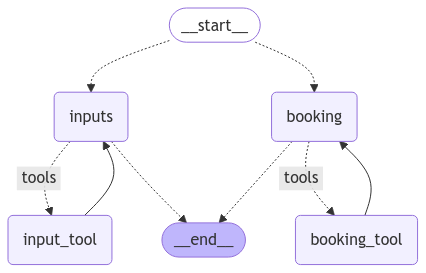

In [15]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [27]:
config = {"configurable": {"thread_id": "3"}}
#graph.update_state(config, {
#    "status": "inputs"
#    })

#user_input = "I would like to rent a car"
#user_input = "pick up on Feb 5 and drop off on Feb 10"
#user_input = "driving from Boston, arriving in Austin"

#user_input = "I would like to rent a VW car in Boston driving to Austin, leaving on Feb 10"
#user_input = "The end date is Feb 28 car to be returned in Austin then"
#user_input = "I will drive from Boston"
user_input = "yes"

for event in graph.stream({"messages": user_input}, config, stream_mode="values"):
    event["messages"][-1].pretty_print()


================================ Human Message =================================

yes
Entering booking node
================================== Ai Message ==================================
Tool Calls:
  booking_tool (call_5IIICZtoA6WhVwLwbvoUl9kH)
 Call ID: call_5IIICZtoA6WhVwLwbvoUl9kH
  Args:
    selected_car: VW
    start_date: 2024-02-10
    end_date: 2024-02-28
    from_city: Boston
    to_city: Austin
Calling tool booking_tool with args {'selected_car': 'VW', 'start_date': '2024-02-10', 'end_date': '2024-02-28', 'from_city': 'Boston', 'to_city': 'Austin'}
Entering booking_tool with dates and selected car variable VW
Tool return value is {'status': 'confirmed', 'selected_car': 'VW'}
================================= Tool Message =================================
Name: booking_tool

{"status": "confirmed", "selected_car": "VW"}
Entering booking node
================================== Ai Message ==================================

Your VW car rental has been successfully booked from

In [ ]:
config = {"configurable": {"thread_id": "1"}}
list(graph.get_state_history(config))

[StateSnapshot(values={'messages': [HumanMessage(content='I would like to rent a car', additional_kwargs={}, response_metadata={}, id='49798cbe-549b-4ece-88db-1cdb3600041c'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ivdY1Opold7yt3hHmQObOE1o', 'function': {'arguments': '{"start_date":"None","end_date":"None","from_city":"None","to_city":"None"}', 'name': 'input_tool'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 201, 'total_tokens': 232, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-8a78b369-1ec0-4ab3-8e82-dc36eca87404-0', tool_calls=[{'name': 'input_tool', 'args': {'start_date': 'None', 'end_date': 'None', 'fr